## K-Means 분할적 군집화
---
- 지정된 K만큼 임의의 중심점(Centroid)를 지정
- 중심점(Centroid)를 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점(Centroid) 계산
- 중심점(Centroid) 이동이 더 이상 변경되지 않을 때까지 반복하는 방법

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## [1] 데이터 로딩 및 준비

In [3]:
iris=load_iris()

In [4]:
irisData=iris.data

In [5]:
irisData.shape

(150, 4)

In [6]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [7]:
irisData=irisData[:, :2]
irisData.shape

(150, 2)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(irisData)

StandardScaler()

In [11]:
scaled_irisData=scaler.transform(irisData)

## [2] 데이터 처리

In [12]:
irisCluster=KMeans(n_clusters=2)

In [13]:
irisCluster.fit(scaled_irisData)

KMeans(n_clusters=2)

In [14]:
# Cluster 객체 속성 확인
print(f'cluster_centers_ : {irisCluster.cluster_centers_}')
print(f'labels_          : {irisCluster.labels_}')
print(f'labels_ Counts   : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f'inertia_         : {irisCluster.inertia_}')
print(f'n_iter_          : {irisCluster.n_iter_}')

cluster_centers_ : [[-0.97822861  0.90390597]
 [ 0.4891143  -0.45195298]]
labels_          : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
labels_ Counts   : (array([0, 1]), array([ 50, 100], dtype=int64))
inertia_         : 166.9517093393448
n_iter_          : 5


In [15]:
# 샘플데이터 => 결정된 군집으로 변환
transIris=irisCluster.transform(scaled_irisData)

In [16]:
irisCluster.cluster_centers_[0]

array([-0.97822861,  0.90390597])

## 시각화
---

In [17]:
import pandas as pd

In [18]:
irisDF=pd.DataFrame(scaled_irisData)
irisDF.shape

(150, 2)

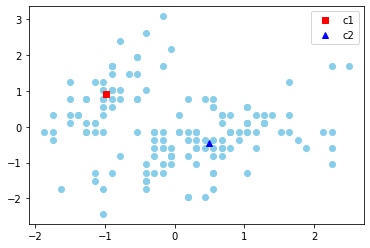

In [19]:
plt.scatter(scaled_irisData[:, 0], scaled_irisData[:, 1], c='skyblue')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'rs', label='c1')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'b^', label='c2')
plt.legend()
plt.show()

In [20]:
inert= []
for n_clusters in range(1, 11):
    irisCluster=KMeans(n_clusters)
    irisCluster.fit(scaled_irisData)
    inert.append(irisCluster.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


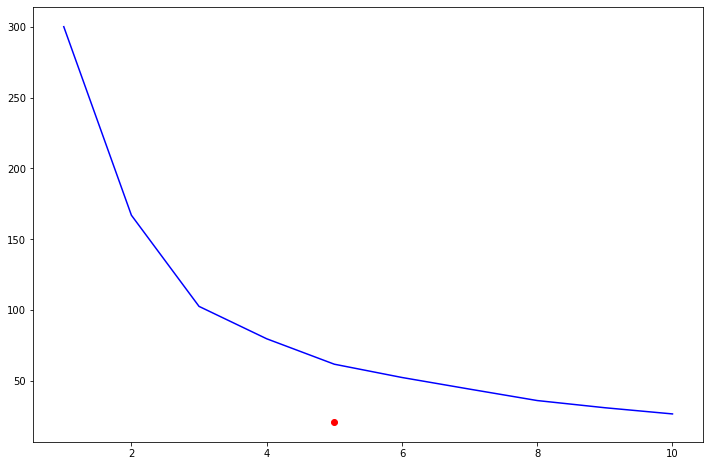

In [21]:
# 최적의 k 찾기
plt.figure(figsize=(12,8))
plt.plot(range(1,11), inert, 'b-')
plt.plot(5,21, 'ro')
plt.show()

## 군집화 성능 체크
---
- 실루엣 계수/지수/인덱스
    * 범위 : -1 ~ 1
        * 1: 군집화 아주 잘 됨
        * 0.5이상 : 군집화 잘 됨
        * -1 : 군집화 안 됨

In [22]:
# 실루엣 점수 <- 1에 가까울수록 군집화 잘 된 것
from sklearn.metrics import silhouette_score

silhouette_score(scaled_irisData, irisCluster.labels_, metric='euclidean')

0.42592735526762737

### n_clusters = 5 에 대한 데이터

In [23]:
irisCluster=KMeans(n_clusters=5)
irisCluster.fit(scaled_irisData)
transIris=irisCluster.transform(scaled_irisData)

# Cluster 객체 속성 확인
print(f'cluster_centers_ : {irisCluster.cluster_centers_}')
print(f'labels_          : {irisCluster.labels_}')
print(f'labels_ Counts   : {np.unique(irisCluster.labels_, return_counts=True)}')
print(f'inertia_         : {irisCluster.inertia_}')
print(f'n_iter_          : {irisCluster.n_iter_}')

cluster_centers_ : [[ 1.22714485  0.17682106]
 [-1.15648001  0.52663905]
 [-0.473405   -1.53739132]
 [ 0.18982966 -0.54745657]
 [-0.57445998  1.95749886]]
labels_          : [1 1 1 1 1 4 1 1 1 1 4 1 1 1 4 4 4 1 4 4 1 4 1 1 1 1 1 1 1 1 1 1 4 4 1 1 1
 1 1 1 1 2 1 1 4 1 4 1 4 1 0 0 0 2 3 3 0 2 0 2 2 3 2 3 3 0 3 3 2 2 3 3 3 3
 3 0 0 0 3 2 2 2 3 3 3 0 0 2 3 2 2 3 3 2 3 3 3 3 2 3 0 3 0 3 0 0 2 0 3 0 0
 3 0 2 3 0 0 0 0 2 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
labels_ Counts   : (array([0, 1, 2, 3, 4]), array([41, 36, 19, 41, 13], dtype=int64))
inertia_         : 61.80924909521251
n_iter_          : 7


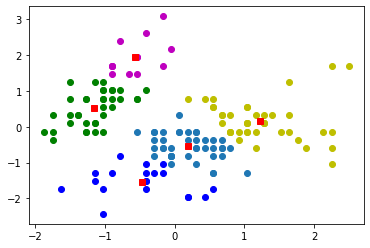

In [32]:
plt.plot(scaled_irisData[irisCluster.labels_==0][:, 0], scaled_irisData[irisCluster.labels_==0][:, 1], 'yo')
plt.plot(scaled_irisData[irisCluster.labels_==1][:, 0], scaled_irisData[irisCluster.labels_==1][:, 1], 'go')
plt.plot(scaled_irisData[irisCluster.labels_==2][:, 0], scaled_irisData[irisCluster.labels_==2][:, 1], 'bo')
plt.plot(scaled_irisData[irisCluster.labels_==3][:, 0], scaled_irisData[irisCluster.labels_==3][:, 1], 'o')
plt.plot(scaled_irisData[irisCluster.labels_==4][:, 0], scaled_irisData[irisCluster.labels_==4][:, 1], 'mo')
plt.plot(irisCluster.cluster_centers_[0][0], irisCluster.cluster_centers_[0][1], 'rs')
plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'rs')
plt.plot(irisCluster.cluster_centers_[2][0], irisCluster.cluster_centers_[2][1], 'rs')
plt.plot(irisCluster.cluster_centers_[3][0], irisCluster.cluster_centers_[3][1], 'rs')
plt.plot(irisCluster.cluster_centers_[4][0], irisCluster.cluster_centers_[4][1], 'rs')
plt.show()

In [25]:
irisCluster.labels_

array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       4, 1, 4, 1, 4, 1, 0, 0, 0, 2, 3, 3, 0, 2, 0, 2, 2, 3, 2, 3, 3, 0,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 2, 2, 2, 3, 3, 3, 0, 0, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 0,
       0, 3, 0, 2, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3])

## 군집화 이후 추가 작업
---
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# 군집화로 생성된 데이터
target=irisCluster.labels_.reshape(-1,1)
target.shape, scaled_irisData.shape

((150, 1), (150, 2))

In [28]:
lrModel=LogisticRegression(random_state=11, max_iter=500)
lrModel.fit(scaled_irisData, irisCluster.labels_)

LogisticRegression(max_iter=500, random_state=11)

In [29]:
pre_label=lrModel.predict(scaled_irisData)

In [30]:
lrModel.score(scaled_irisData, irisCluster.labels_)

0.9866666666666667

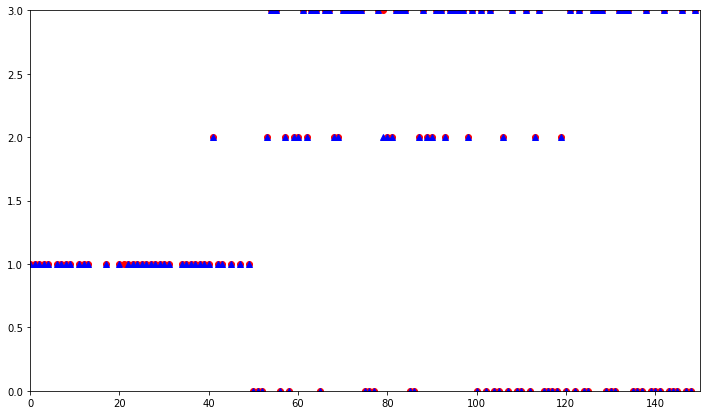

In [31]:
plt.figure(figsize=(12,7))
plt.plot(pre_label, 'ro')
plt.plot(irisCluster.labels_, 'b^')
plt.axis([0, 150, 0, 3])
plt.show()